In [29]:
# Add the necessary libraries

In [95]:
import pandas as pd
from pathlib import Path
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [31]:
# Import and prepare the data

In [32]:
whales_df = pd.read_csv(Path("Resources/whale_navs.csv"),
                        index_col = "date",
                        squeeze = True,
                        parse_dates = True,
                        infer_datetime_format = True)
whales_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.  \
date                                                       
2014-10-01                  31.950240          14.991826   
2014-10-02                  31.936110          14.994072   
2014-10-03                  31.969707          14.999596   
2014-10-06                  32.048215          14.999471   
2014-10-07                  31.964216          14.994720   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  S&P 500  
date                                                                      
2014-10-01                    59.977830               51.948712   194.35  
2014-10-02                    59.978626               51.957619   194.38  
2014-10-03                    60.002264               52.022484   196.52  
2014-10-06                    60.006244               52.036387   196.29  
2014-10-07                    59.993735               52.005864   193.26

In [33]:
# Calculate the daily returns using the pct_change function

In [34]:
daily_returns = whales_df.pct_change()
daily_returns

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.  \
date                                                       
2014-10-01                        NaN                NaN   
2014-10-02                  -0.000442           0.000150   
2014-10-03                   0.001052           0.000368   
2014-10-06                   0.002456          -0.000008   
2014-10-07                  -0.002621          -0.000317   
...                               ...                ...   
2020-09-04                  -0.001079           0.005050   
2020-09-08                  -0.001737          -0.001888   
2020-09-09                   0.001115           0.002123   
2020-09-10                  -0.001258           0.001389   
2020-09-11                  -0.000418          -0.001930   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC   S&P 500  
date                                                                       
2014-10-01                          NaN                     NaN       NaN  
2014-10-02                     0.000013                0.000171  0.000154  
2014-10-03                     0.000394                0.001248  0.011009  
2014-10-06                     0.000066                0.000267 -0.001170  
2014-10-07                    -0.000208               -0.000587 -0.015436  
...                                 ...                     ...       ...  
2020-09-04                    -0.000653               -0.003985 -0.008165  
2020-09-08                    -0.001270               -0.005019 -0.027323  
2020-09-09                     0.002701                0.001817  0.019747  
2020-09-10                    -0.001591               -0.002398 -0.017364  
2020-09-11                    -0.000434               -0.001016  0.000509  

[1498 rows x 5 columns]

In [35]:
daily_returns = daily_returns.dropna()
daily_returns.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.  \
date                                                       
2014-10-02                  -0.000442           0.000150   
2014-10-03                   0.001052           0.000368   
2014-10-06                   0.002456          -0.000008   
2014-10-07                  -0.002621          -0.000317   
2014-10-08                   0.000390           0.000369   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC   S&P 500  
date                                                                       
2014-10-02                     0.000013                0.000171  0.000154  
2014-10-03                     0.000394                0.001248  0.011009  
2014-10-06                     0.000066                0.000267 -0.001170  
2014-10-07                    -0.000208               -0.000587 -0.015436  
2014-10-08                     0.000242                0.000842  0.017489

In [36]:
# Use the default plot function to visualize the daily returns for each fund

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='date'>

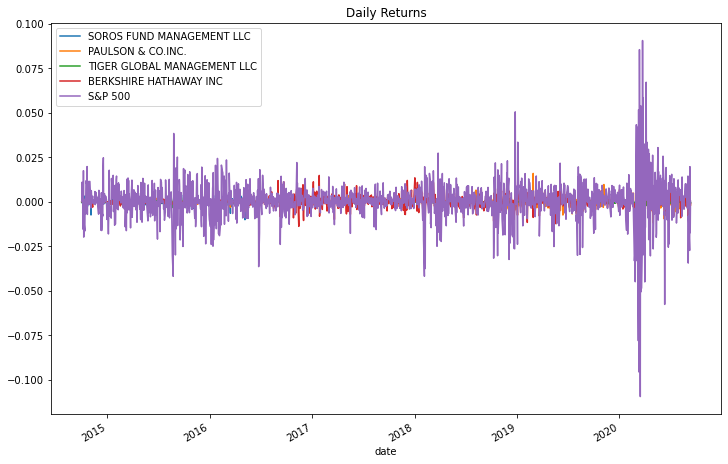

In [37]:
daily_returns.plot(figsize=(12,8), title="Daily Returns")

In [ ]:
# Drop out S&P 500

In [40]:
fund_daily_returns=daily_returns.drop(columns="S&P 500")

In [41]:
fund_daily_returns.plot(figsize=(12,8), title="Daily Returns - Funds Only")

<AxesSubplot:title={'center':'Daily Returns - Funds Only'}, xlabel='date'>

In [38]:
# Calculate the cumulative of the daily returns for each fund

In [39]:
cumulative_returns = (1 + daily_returns).cumprod()
cumulative_returns.tail()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.  \
date                                                       
2020-09-04                   0.987355           0.958187   
2020-09-08                   0.985640           0.956378   
2020-09-09                   0.986739           0.958409   
2020-09-10                   0.985498           0.959740   
2020-09-11                   0.985086           0.957887   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC   S&P 500  
date                                                                       
2020-09-04                     1.055714                1.244856  1.762645  
2020-09-08                     1.054373                1.238608  1.714484  
2020-09-09                     1.057221                1.240858  1.748341  
2020-09-10                     1.055539                1.237883  1.717983  
2020-09-11                     1.055081                1.236625  1.718858

In [12]:
# Plot the cumulative returns to gain a visual

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='date'>

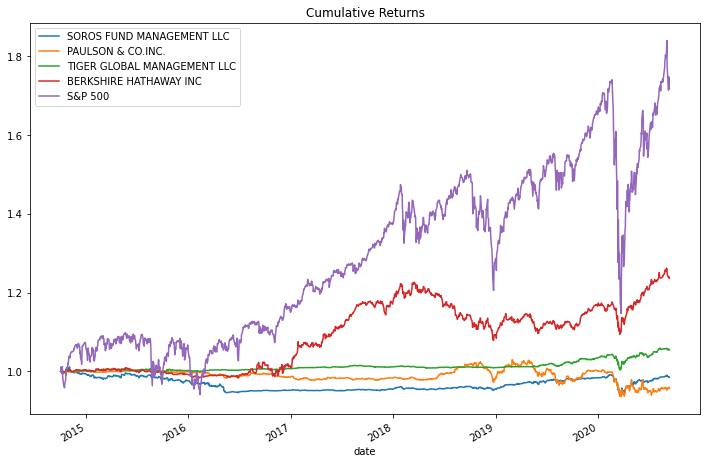

In [42]:
cumulative_returns.plot(figsize=(12,8), title = "Cumulative Returns")

In [43]:
# Drop out the S&P to compare the funds directly

In [44]:
fund_cumulative_returns = cumulative_returns.drop(columns="S&P 500")
fund_cumulative_returns

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.  \
date                                                       
2014-10-02                   0.999558           1.000150   
2014-10-03                   1.000609           1.000518   
2014-10-06                   1.003066           1.000510   
2014-10-07                   1.000437           1.000193   
2014-10-08                   1.000828           1.000563   
...                               ...                ...   
2020-09-04                   0.987355           0.958187   
2020-09-08                   0.985640           0.956378   
2020-09-09                   0.986739           0.958409   
2020-09-10                   0.985498           0.959740   
2020-09-11                   0.985086           0.957887   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
date                                                             
2014-10-02                     1.000013                1.000171  
2014-10-03                     1.000407                1.001420  
2014-10-06                     1.000474                1.001688  
2014-10-07                     1.000265                1.001100  
2014-10-08                     1.000507                1.001943  
...                                 ...                     ...  
2020-09-04                     1.055714                1.244856  
2020-09-08                     1.054373                1.238608  
2020-09-09                     1.057221                1.240858  
2020-09-10                     1.055539                1.237883  
2020-09-11                     1.055081                1.236625  

[1497 rows x 4 columns]

<AxesSubplot:title={'center':'Cumulative Returns - Funds Only'}, xlabel='date'>

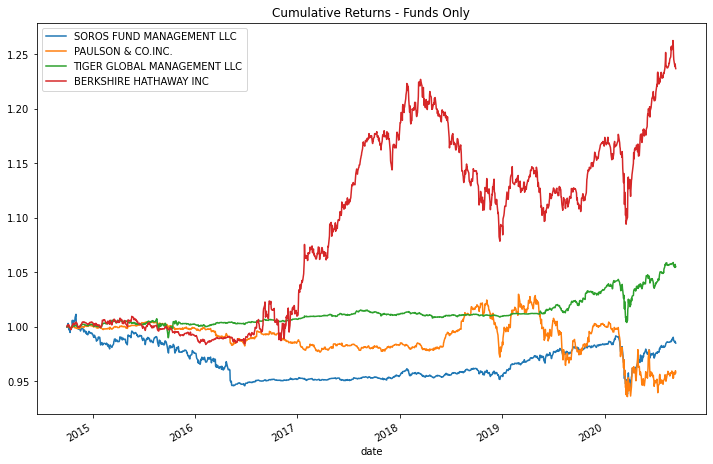

In [45]:
fund_cumulative_returns.plot(figsize=(12,8), title = "Cumulative Returns - Funds Only")

In [16]:
# Visualize the volatility using the kind=box parameter

In [149]:
daily_returns.plot(figsize= (12,8) ,kind="box", title = "Volatility", rot=45)

<AxesSubplot:title={'center':'Volatility'}>

In [ ]:
# Drop out the S&P to visualize the funds only

In [47]:
fund_daily_returns.plot(figsize=(12,8), kind= "box", title = "Volatility - Funds Only")

<AxesSubplot:title={'center':'Volatility - Funds only'}>

In [19]:
# Find the standard deviation of daily returns for each

In [20]:
standard_deviation=daily_returns.std()
standard_deviation

SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
TIGER GLOBAL MANAGEMENT LLC    0.000996
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

In [21]:
# Find the annual standard deviation for each
# standard_deviation * 252 ** (1/2)

In [22]:
annualized_standard_deviation = standard_deviation * np.sqrt(252)
annualized_standard_deviation

SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
TIGER GLOBAL MANAGEMENT LLC    0.015804
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

In [23]:
# Find the standard deviation for rolling 21 day windows

<AxesSubplot:title={'center':'Rolling 21 day Standard Deviations'}, xlabel='date'>

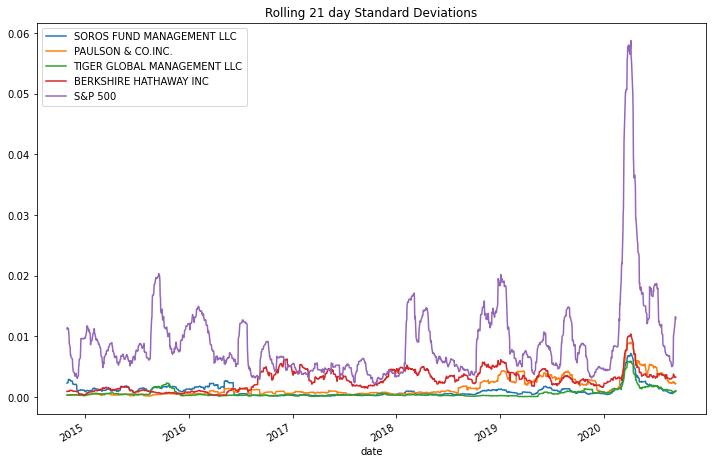

In [24]:
daily_returns.rolling(window=21).std().plot(figsize=(12,8), title = "Rolling 21 day Standard Deviations")

<AxesSubplot:title={'center':'Rolling 21 day Standard Deviations - Funds Only'}, xlabel='date'>

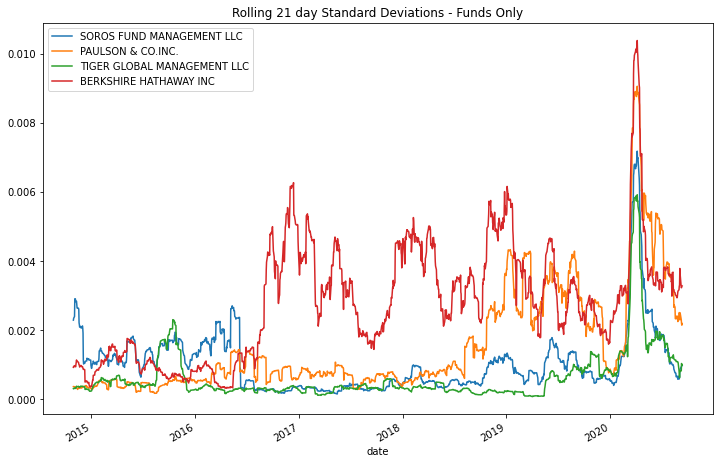

In [25]:
fund_daily_returns = daily_returns.drop(columns= "S&P 500")
fund_daily_returns.rolling(window=21).std().plot(figsize=(12,8), title = "Rolling 21 day Standard Deviations - Funds Only")

In [ ]:
# Calculate the Annualized Returns

In [105]:
average_annual_return_portfolio = daily_returns.mean()*252
average_annual_return_portfolio

SOROS FUND MANAGEMENT LLC     -0.002281
PAULSON & CO.INC.             -0.006633
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

In [111]:
# Calculate the Sharpe Ratio

In [112]:
sharpe_ratios = average_annual_return_portfolio/ annualized_standard_deviation
sharpe_ratios.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.717512
S&P 500                        0.589612
TIGER GLOBAL MANAGEMENT LLC    0.579002
SOROS FUND MANAGEMENT LLC     -0.102290
PAULSON & CO.INC.             -0.189998
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio'}, ylabel='Sharpe Ratio'>

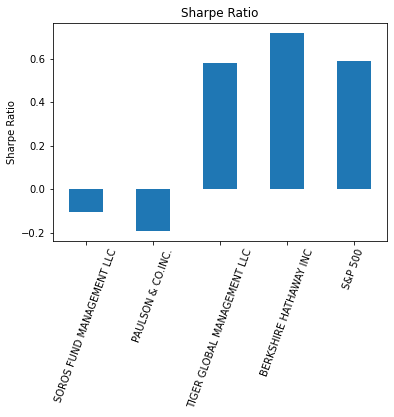

In [121]:
sharpe_ratios.plot(kind="bar",title='Sharpe Ratio',rot=70,ylabel="Sharpe Ratio")

In [26]:
# Calculate the variance of the S&P 500

In [134]:
var_spy = daily_returns.loc[:,"S&P 500"].rolling(60).var()
var_spy=var_spy.dropna()
var_spy.head()

date
2014-12-26    0.000078
2014-12-29    0.000078
2014-12-30    0.000077
2014-12-31    0.000079
2015-01-02    0.000075
Name: S&P 500, dtype: float64

In [61]:
# Pick two of the funds to compare against the S&P 500

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='date', ylabel='Total Return'>

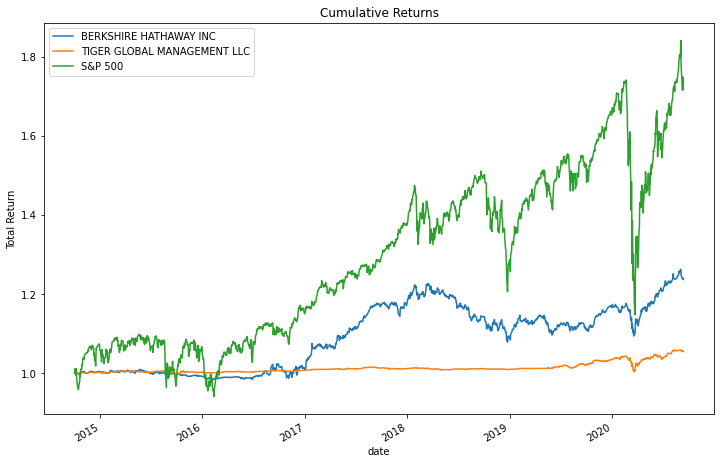

In [243]:
compare_returns=cumulative_returns.loc[:,["BERKSHIRE HATHAWAY INC",'TIGER GLOBAL MANAGEMENT LLC','S&P 500']]
compare_returns.plot(figsize=(12,8), title= "Cumulative Returns",ylabel="Total Return")

In [ ]:
# Compare the variances for each fund

In [173]:
compare_daily_returns.plot(kind="box", title= "Daily Returns", rot=45)

<AxesSubplot:title={'center':'Daily Returns'}>

In [244]:
# Calcuate the Variance for each fund

In [227]:
variance=compare_daily_returns.var()
variance

BERKSHIRE HATHAWAY INC         1.060356e-05
TIGER GLOBAL MANAGEMENT LLC    9.911906e-07
S&P 500                        1.333940e-04
dtype: float64

In [228]:
#Use the 60-day rolling window to show the variance of each fund,
var_compare=compare_daily_returns.rolling(60).var()
var_compare=var_compare.dropna()
var_compare.plot(kind="box", rot=45, title= "60-Day Rolling Variance")

<AxesSubplot:title={'center':'60-Day Rolling Variance'}>

In [231]:
# Calculate the covariance.
# Set the market variance
variance_index= compare_daily_returns["S&P 500"].var()
variance_index

0.00013339401911764478

In [253]:
# Berkshire vs S&P 500
berk_covariance=compare_daily_returns["BERKSHIRE HATHAWAY INC"].cov(compare_daily_returns["S&P 500"])
berk_covariance

2.2869504887498336e-05

In [192]:
# Tiger vs S&P 500
tiger_covariance = compare_daily_returns["TIGER GLOBAL MANAGEMENT LLC"].cov(compare_daily_returns["S&P 500"])
tiger_covariance

7.60628400214983e-06

In [141]:
# Calculate the beta of the portfolio. 

In [193]:
# Berkshire beta
berk_beta= berk_covariance/variance_index
berk_beta

0.17144325539309924

In [194]:
# Tiger beta
tiger_beta = tiger_covariance/variance_index
tiger_beta

0.05702117720466602

In [233]:
# Calculate the average value of the 60-day rolling beta of the portfolio.
# rolling_60_beta = rolling_60_covariance / rolling_60_variance

<AxesSubplot:title={'center':'60 Day Rolling Variance of the S&P 500'}, xlabel='date'>

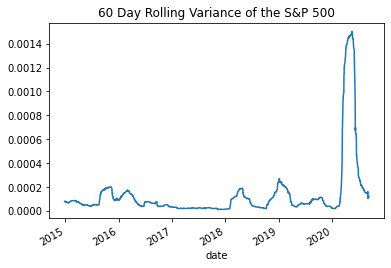

In [234]:
rolling_variance=compare_daily_returns["S&P 500"].rolling(window=60).var()
rolling_variance=rolling_variance.dropna()
rolling_variance.plot(title= "60 Day Rolling Variance of the S&P 500")

In [258]:
berk_rolling_covariance=compare_daily_returns["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(rolling_variance)
berk_rolling_covariance=berk_rolling_covariance.dropna()
berk_rolling_covariance.tail()

date
2020-09-04    7.537738e-08
2020-09-08    5.979353e-08
2020-09-09    4.478451e-08
2020-09-10    3.565820e-08
2020-09-11    3.034646e-08
dtype: float64

<AxesSubplot:title={'center':'Berkshire vs S&P 500 - Rolling Covariance'}, xlabel='date'>

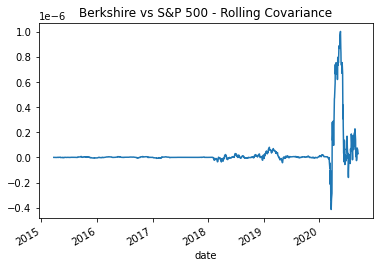

In [259]:
berk_rolling_covariance.plot(title="Berkshire vs S&P 500 - Rolling Covariance")

In [257]:
tiger_rolling_covariance=compare_daily_returns["TIGER GLOBAL MANAGEMENT LLC"].rolling(window=60).cov(rolling_variance)
tiger_rolling_covariance=tiger_rolling_covariance.dropna()
tiger_rolling_covariance.tail()

date
2020-09-04    2.712286e-09
2020-09-08   -2.454167e-09
2020-09-09   -1.081029e-08
2020-09-10   -1.501395e-08
2020-09-11   -1.450795e-08
dtype: float64

<AxesSubplot:title={'center':'Tiger vs S&P 500 - Rolling Covariance'}, xlabel='date'>

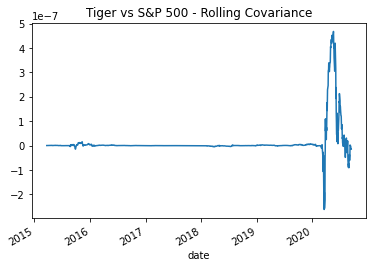

In [256]:
tiger_rolling_covariance.plot(title="Tiger vs S&P 500 - Rolling Covariance")

In [251]:
# Overlay the plots 
ax= tiger_rolling_covariance.plot(figsize=(14,9),title="Tiger & Berkshire - Rolling Covariance against S&P 500")
berk_rolling_covariance.plot(ax=ax)
ax.legend(["Tiger", "Berkshire"])

In [ ]:
# Plot the 60-day rolling beta.

<AxesSubplot:title={'center':'Tger Rolling Beta vs S&P 500'}, xlabel='date'>

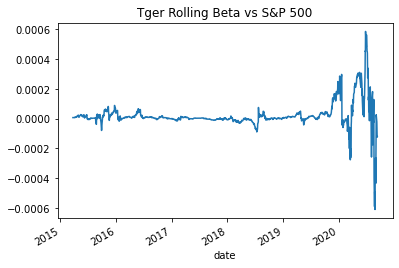

In [235]:
tiger_rolling_beta=tiger_rolling_covariance/rolling_variance
tiger_rolling_beta=tiger_rolling_beta.dropna()
tiger_rolling_beta.plot(title="Tiger Rolling Beta vs S&P 500")

<AxesSubplot:title={'center':'Berkshire Rolling Beta vs S&P 500'}, xlabel='date'>

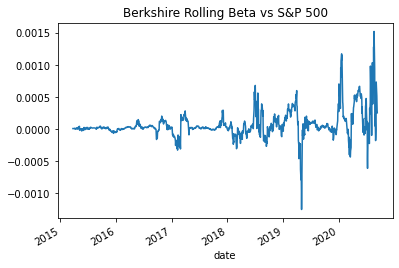

In [237]:
berk_rolling_beta=berk_rolling_covariance/rolling_variance
berk_rolling_beta=berk_rolling_beta.dropna()
berk_rolling_beta.plot(title="Berkshire Rolling Beta vs S&P 500")

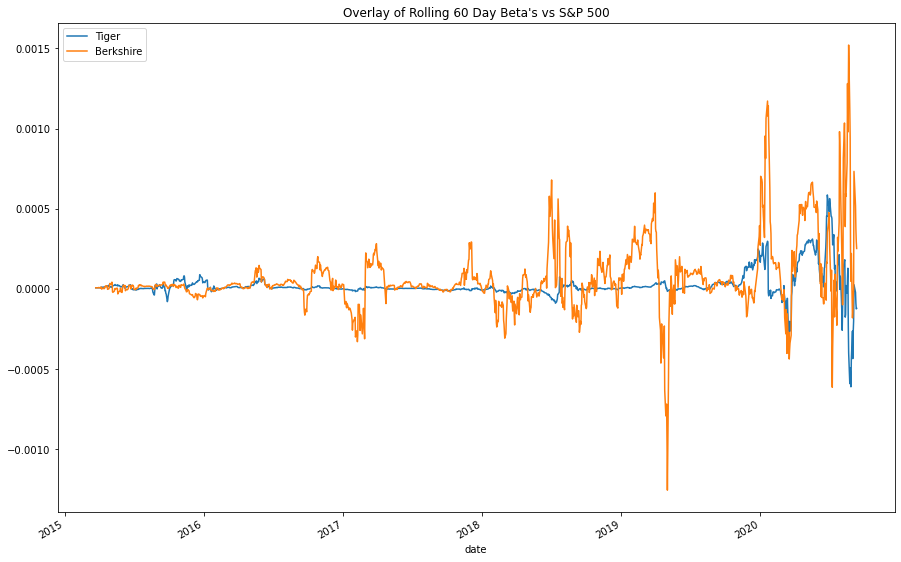

In [242]:
 # Overlay the plots
ax=tiger_rolling_beta.plot(figsize=(15,10),title="Overlay of Rolling 60 Day Beta's vs S&P 500")
berk_rolling_beta.plot(ax=ax)
ax.legend(["Tiger", "Berkshire"],)